# Feature preprocessing

### Convert all categorical variables using ordinal/dummy encoding
### Normalize all features
### Generate a few new features.

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
train = pd.read_csv("../Data/HousingPrices/train.csv", index_col="Id")
test = pd.read_csv("../Data/HousingPrices/test.csv", index_col="Id")

train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [ ]:
train.shape, test.shape

In [31]:
print(train.head(5))

    mssubclass  lotfrontage  lotarea  utilities  overallqual  overallcond  \
Id                                                                          
1           60         65.0     8450        0.0            7            5   
2           20         80.0     9600        0.0            6            8   
3           60         68.0    11250        0.0            7            5   
4           70         60.0     9550        0.0            7            5   
5           60         84.0    14260        0.0            8            5   

    yearbuilt  yearremodadd  masvnrarea  exterqual  ...  \
Id                                                  ...   
1        2003          2003       196.0        2.0  ...   
2        1976          1976         0.0        3.0  ...   
3        2001          2002       162.0        2.0  ...   
4        1915          1970         0.0        3.0  ...   
5        2000          2000       350.0        2.0  ...   

    salecondition_Partial  saletype_COD  salet

In [32]:
test.head(5)

,mssubclass,lotfrontage,lotarea,utilities,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,exterqual,...,salecondition_Partial,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,0.0,5,6,1961,1961,0.0,3.0,...,0,0,0,0,0,0,0,0,0,1
1462,20,81.0,14267,0.0,6,6,1958,1958,108.0,3.0,...,0,0,0,0,0,0,0,0,0,1
1463,60,74.0,13830,0.0,5,5,1997,1998,0.0,3.0,...,0,0,0,0,0,0,0,0,0,1
1464,60,78.0,9978,0.0,6,6,1998,1998,20.0,3.0,...,0,0,0,0,0,0,0,0,0,1
1465,120,43.0,5005,0.0,8,5,1992,1992,0.0,2.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
totalnull = 0
for column in train.columns:
    currentnull = train[column].isnull().sum()
    totalnull += currentnull
    print(column, currentnull, totalnull)

In [ ]:
totalnull = 0
for column in test.columns:
    currentnull = test[column].isnull().sum()
    totalnull += currentnull
    print(column, currentnull, totalnull)

In [ ]:
train.info()

In [ ]:
corr = train.corr()['saleprice'].to_frame()
corr.sort_values(by='saleprice', ascending=False)

# Fill missing values
  ### Run this for quick fillna

In [3]:
# Some specific value inputs that were found via ED below - 
# filled so that they do not become a generic NA/0.0
test.loc[2421, 'poolqc'] = test.loc[2504, 'poolqc'] = test.loc[2600, 'poolqc'] = 'Fa'
test.loc[2041, 'bsmtcond'] = test.loc[2186, 'bsmtcond'] = test.loc[2525, 'bsmtcond'] = 'TA' 

nulltoNA = [train.alley, test.alley, 
train.masvnrtype, test.masvnrtype, 
train.bsmtqual, train.bsmtcond, train.bsmtexposure, train.bsmtfintype1, train.bsmtfintype2, test.bsmtqual, test.bsmtcond, test.bsmtexposure, test.bsmtfintype1, test.bsmtfintype2, 
train.poolqc, test.poolqc, 
test.kitchenqual, 
train.fireplacequ, test.fireplacequ, 
train.garagetype, train.garagefinish, train.garagequal, train.garagecond, 
test.garagetype, test.garagefinish, test.garagequal, test.garagecond, 
train.fence, test.fence, 
train.miscfeature, test.miscfeature]

nulltoZero = [train.lotfrontage, test.lotfrontage, 
test.bsmtfinsf1, test.bsmtfinsf2, test.bsmtunfsf, 
test.totalbsmtsf, test.bsmtfullbath, test.bsmthalfbath, 
train.garageyrblt, test.garageyrblt, test.garagecars, test.garagearea]

for item in nulltoNA:
    item.fillna('NA', inplace=True)

for item in nulltoZero:
    item.fillna(0, inplace=True)

test.mszoning.fillna('RL', inplace=True)

test.utilities.fillna('AllPub', inplace=True)

test.exterior1st.fillna('VinylSd', inplace=True)
test.exterior2nd.fillna('VinylSd', inplace=True)

train.masvnrtype.fillna('None', inplace=True)
train.masvnrarea.fillna(train.masvnrarea.median(), inplace=True) # median is 0
test.masvnrtype.fillna('None', inplace=True)
test.masvnrarea.fillna(train.masvnrarea.median(), inplace=True)

test.functional.fillna('Typ', inplace=True)

train.electrical.fillna('SBrkr', inplace=True)

test.kitchenqual.fillna('TA', inplace=True)

test.fillna('WD', inplace=True)

## MSzoning

In [ ]:
sns.countplot(test.mszoning)

In [ ]:
test.mszoning.fillna('RL', inplace=True)

## Lot Frontage

In [ ]:
train.lotfrontage.fillna(0.0, inplace=True)
test.lotfrontage.fillna(0.0, inplace=True)

## Alley

In [ ]:
set(train.alley)

In [ ]:
sns.barplot(x=train.alley, y=train.saleprice)

In [ ]:
train.alley.fillna('NA', inplace=True)
test.alley.fillna('NA', inplace=True)

## Utitlities

In [ ]:
sns.countplot(test.utilities)

In [ ]:
test.utilities.fillna('AllPub', inplace=True)

## exterior 1st and 2nd

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(2,1,1)
sns.countplot(test.exterior1st)
plt.subplot(2,1,2)
sns.countplot(test.exterior2nd)

In [ ]:
test.exterior1st.fillna('VinylSd', inplace=True)
test.exterior2nd.fillna('VinylSd', inplace=True)

In [ ]:
test[test['exterior1st'] == 'VinylSd'][pd.Index(['exterior2nd'])].values

## Masvnr - masvnrtype masvnrarea

In [ ]:
set(train.masvnrtype), set(train.masvnrarea)

In [ ]:
train.masvnrarea.median()

In [ ]:
train.masvnrarea.isnull().sum(), train.masvnrtype.isnull().sum()

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.countplot(train.masvnrtype)
plt.subplot(1,2,2)
sns.distplot(train.masvnrarea)

In [ ]:
train.masvnrtype.fillna('None', inplace=True)
train.masvnrarea.fillna(0, inplace=True)
test.masvnrtype.fillna('None', inplace=True)
test.masvnrarea.fillna(train.masvnrarea.median(), inplace=True)

## Bsmt -- bsmtqual bsmtcond bsmtexposure bsmtfintype1 bsmtfintpye2

In [ ]:
set(train.bsmtqual), set(train.bsmtcond), set(train.bsmtexposure)

In [ ]:
train[train['bsmtexposure'].isnull()][pd.Index(['bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'bsmtfinsf1', 'bsmtfinsf2'])]

In [ ]:
set(train.bsmtfintype1), set(train.bsmtfintype2)

In [ ]:
test[test['bsmtunfsf'].isnull()][pd.Index(['bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf'])]

In [ ]:
test[test['bsmtfullbath'].isnull()][pd.Index(['bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'bsmtfinsf1', 'bsmtfinsf2', 'totalbsmtsf', 'bsmtfullbath', 'bsmthalfbath'])]

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.countplot(test.bsmtfullbath)
plt.subplot(1,2,2)
sns.countplot(test.bsmtcond)

In [ ]:
# 2041 2186 2525 - these are the only values that have only bsmtcond as null so we fill them individually with non null values
test.loc[2041, 'bsmtcond'] = 'TA'  
test.loc[2186, 'bsmtcond'] = 'TA'
test.loc[2525, 'bsmtcond'] = 'TA'

In [ ]:
test.bsmtqual.fillna('NA', inplace=True)
test.bsmtcond.fillna('NA', inplace=True)
test.bsmtexposure.fillna('NA', inplace=True)
test.bsmtfintype1.fillna('NA', inplace=True)
test.bsmtfintype2.fillna('NA', inplace=True)
test.bsmtfinsf1.fillna(0.0, inplace=True)
test.bsmtfinsf2.fillna(0.0, inplace=True)
test.bsmtunfsf.fillna(0.0, inplace=True)
test.totalbsmtsf.fillna(0.0, inplace=True)
test.bsmtfullbath.fillna(0.0, inplace=True)
test.bsmthalfbath.fillna(0.0, inplace=True)

## Kitchenqual

In [ ]:
sns.countplot(test.kitchenqual)

In [ ]:
test[test['kitchenqual'].isnull()][pd.Index(['kitchenabvgr'])]

In [ ]:
test.kitchenqual.fillna('TA', inplace=True)

## Functional

In [ ]:
sns.countplot(test.functional)

In [ ]:
test.fillna('Typ', inplace=True)

## PoolQC

In [ ]:
sns.barplot(x=train.poolqc, y=train.saleprice)

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(train.lotfrontage, hue=train.saleprice)

In [ ]:
train.poolqc.isnull().sum()

In [ ]:
test.loc[2421, 'poolqc'] = test.loc[2504, 'poolqc'] = test.loc[2600, 'poolqc'] = 'Fa'

In [ ]:
train.poolqc.fillna('NA', inplace=True)
test.poolqc.fillna('NA', inplace=True)

In [ ]:
test[(test['poolqc'].isnull()) & (test['poolarea'] > 0)][pd.Index(['poolqc', 'poolarea'])]

## Electrical

In [ ]:
set(train['electrical'])

In [ ]:
sns.countplot(train.electrical)

In [ ]:
train.electrical.fillna('SBrkr', inplace=True)

## fireplacequ 

In [ ]:
set(train.fireplacequ)

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.countplot(train.fireplacequ)
plt.subplot(1,3,2)
sns.barplot(train.fireplacequ, train.saleprice)
plt.subplot(1,3,3)
sns.countplot(train.fireplaces)

In [ ]:
fireplacenulls = test[test['fireplacequ'].isnull()][pd.Index(['fireplaces'])].values
fireplacenulls

In [ ]:
zeros = [i for fireplace in fireplacenulls for i in fireplace]
set(zeros)

In [ ]:
train.fireplacequ.fillna('NA', inplace=True)
test.fireplacequ.fillna('NA', inplace=True)

## Garage -- garagetype garageyrblt garagefinish garagequal garagecond

In [ ]:
set(train.garagetype), set(train.garagefinish), set(train.garagequal), set(train.garagecond) #set

In [ ]:
garagecolumns = ['garagetype', 'garageyrblt', 'garagefinish', 'garagecars', 'garagequal', 'garagearea', 'garagecond']
for col in garagecolumns:
    print(test[col].isnull().sum())

In [ ]:
train[train['garagetype'].isnull()][pd.Index(['garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond'])]

In [ ]:
test[test['garagecars'].isnull()][pd.Index(['garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond'])]

In [ ]:
train.garagetype.fillna('NA', inplace=True)
train.garagefinish.fillna('NA', inplace=True)
train.garageyrblt.fillna(0, inplace=True)
train.garagequal.fillna('NA', inplace=True)
train.garagecond.fillna('NA', inplace=True)

test.garagetype.fillna('NA', inplace=True)
test.garagefinish.fillna('NA', inplace=True)
test.garageyrblt.fillna(0, inplace=True)
test.garagequal.fillna('NA', inplace=True)
test.garagecond.fillna('NA', inplace=True)
test.garagecars.fillna(0.0, inplace=True)
test.garagearea.fillna(0.0, inplace=True)

## Fence

In [ ]:
set(train.fence)

In [ ]:
sns.barplot(train.fence, train.saleprice)

In [ ]:
train.fence.fillna('NA', inplace=True)

## Miscfeature

In [ ]:
set(train.miscfeature)

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.barplot(train.miscfeature, train.saleprice)
plt.subplot(1,2,2)
sns.countplot(train.miscfeature)

In [ ]:
train.miscfeature.fillna('NA', inplace=True)

## Saletype

In [ ]:
sns.countplot(test.saletype)

In [ ]:
test.fillna('WD', inplace=True)

# final check

In [ ]:
train.isnull().sum().sum(), test.isnull().sum().sum()

# Feature Processing
### Ordinal and one-hot encoding categorical variables
### processing numeric variables using logscaling and normalization

{'condition2_RRAe',
 'condition2_RRAn',
 'condition2_RRNn',
 'electrical_Mix',
 'exterior1st_ImStucc',
 'exterior1st_Stone',
 'exterior2nd_Other',
 'heating_Floor',
 'heating_OthW',
 'housestyle_2.5Fin',
 'miscfeature_TenC',
 'roofmatl_ClyTile',
 'roofmatl_Membran',
 'roofmatl_Metal',
 'roofmatl_Roll'}

In [5]:
np.union1d(train.condition2, test.condition2)
# np.union1d(train.electrical, test.electrical)
# np.union1d(train.exterior1st, test.exterior1st)
# np.union1d(train.exterior2nd, test.exterior2nd)
# np.union1d(train.heating, test.heating)
# np.union1d(train.housestyle, test.housestyle)
# np.union1d(train.miscfeature, test.miscfeature)
# np.union1d(train.roofmatl, test.roofmatl)

array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'],
      dtype=object)

In [5]:
ordinals = ['utilities', 'exterqual', 'extercond', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1','bsmtfintype2', 'heatingqc', 'centralair', 'kitchenqual', 'functional', 'fireplacequ', 'garagefinish', 'garagequal', 'garagecond', 'poolqc', 'fence']

dummys = ['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'foundation', 'heating', 'electrical', 'garagetype', 'paveddrive', 'miscfeature', 'salecondition', 'saletype']

numerical = ['lotfrontage', 'lotarea', 'mssubclass', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroom', 'kitchen', 'totrmsabvgrd', 'fireplaces', 'garagecars', 'yearbuilt', 'yearremodadd', 'garageyrblt', 'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval', 'mosold', 'yrsold']

In [11]:
from sklearn.preprocessing import Normalizer

<AxesSubplot:ylabel='Density'>

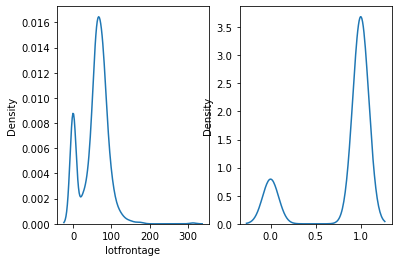

In [22]:
plt.subplot(1,2,1)
sns.kdeplot(train.lotfrontage)
frontagereform = train.lotfrontage.values.reshape(-1,1)
lotfrontage = Normalizer().fit(frontagereform)
plt.subplot(1,2,2)
sns.kdeplot(lotfrontage.transform(frontagereform)[:, 0])

In [6]:
from sklearn.preprocessing import RobustScaler, OrdinalEncoder

In [7]:
ordinalEnc = OrdinalEncoder()
train[ordinals] = ordinalEnc.fit_transform(train[ordinals])
test[ordinals] = ordinalEnc.fit_transform(test[ordinals])

In [8]:
train = pd.get_dummies(train, columns = dummys)
test = pd.get_dummies(test, columns = dummys)

In [ ]:
train.shape

# Modeling the data for prediction

In [9]:
x_train = train.drop("saleprice", axis=1)
y_train = train["saleprice"]
x_test = test
x_train.shape, y_train.shape, x_test.shape

((1460, 232), (1460,), (1459, 217))

In [10]:
for i in list(set(x_train).difference(set(x_test))):
    print(x_train[i].value_counts())

0    1458
1       2
Name: heating_OthW, dtype: int64
0    1458
1       2
Name: exterior1st_Stone, dtype: int64
0    1459
1       1
Name: roofmatl_Roll, dtype: int64
0    1459
1       1
Name: roofmatl_Membran, dtype: int64
0    1452
1       8
Name: housestyle_2.5Fin, dtype: int64
0    1459
1       1
Name: electrical_Mix, dtype: int64
0    1459
1       1
Name: exterior1st_ImStucc, dtype: int64
0    1458
1       2
Name: condition2_RRNn, dtype: int64
0    1459
1       1
Name: roofmatl_ClyTile, dtype: int64
0    1459
1       1
Name: heating_Floor, dtype: int64
0    1459
1       1
Name: roofmatl_Metal, dtype: int64
0    1459
1       1
Name: condition2_RRAe, dtype: int64
0    1459
1       1
Name: condition2_RRAn, dtype: int64
0    1459
1       1
Name: exterior2nd_Other, dtype: int64
0    1459
1       1
Name: miscfeature_TenC, dtype: int64


In [11]:
x_train = x_train.drop(list(set(x_train).difference(set(x_test))), axis=1)

In [12]:
x_train.shape, x_test.shape

((1460, 217), (1459, 217))

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(random_state=0)
clf.fit(x_train, y_train)

GradientBoostingRegressor(random_state=0)

In [14]:
predictions = clf.predict(x_test)

In [15]:
submission = {'Id': x_test.index.values, 'SalePrice': predictions}
final_submissions = pd.DataFrame(submission)
final_submissions.head()

,Id,SalePrice
0,1461,122807.296749
1,1462,163449.222662
2,1463,177462.872343
3,1464,177857.038802
4,1465,197217.119865


In [22]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb 
from sklearn.svm import SVR

KFold_Score = pd.DataFrame()
regressors = ['ElasticNet', 'Lasso', 'BayesianRidge', 'LassoLarsIC', 'RandomForestRegressor', 'GrandientBoostingResgressor', 'KernelRidge', 'XGBRegressor', 'LGBMRegressor', 'SVR']
models = [ElasticNet(random_state=0), 
            Lasso(), 
            BayesianRidge(compute_score=True), 
            LassoLarsIC(criterion='bic'), 
            RandomForestRegressor(random_state=0), 
            GradientBoostingRegressor(random_state=0), 
            KernelRidge(), 
            xgb.XGBRegressor(),
            lgb.LGBMRegressor(), 
            make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))]

j = 0
for model in models:
    cv = KFold(n_splits=5, random_state=0, shuffle=True)
    KFold_Score[regressors[j]] = (cross_val_score(model, x_train, np.ravel(y_train), scoring = 'neg_mean_squared_error', cv=cv))
    j = j+1

In [23]:
mean = pd.DataFrame(KFold_Score.mean(), index= regressors)
KFold_Score = pd.concat([KFold_Score,mean.T])
KFold_Score.index=['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean']
KFold_Score.T.sort_values(by=['Mean'], ascending = False)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
GrandientBoostingResgressor,-7.665053e+08,-6.384071e+08,-1.169674e+09,-5.840417e+08,-4.387023e+08,-7.194661e+08
LGBMRegressor,-1.103722e+09,-7.061821e+08,-1.154664e+09,-7.193796e+08,-5.774835e+08,-8.522863e+08
RandomForestRegressor,-1.050684e+09,-6.682403e+08,-1.089465e+09,-8.853090e+08,-5.892826e+08,-8.565963e+08
XGBRegressor,-1.056317e+09,-8.031145e+08,-1.376386e+09,-7.982655e+08,-5.354808e+08,-9.139128e+08
BayesianRidge,-2.042354e+09,-6.675327e+08,-1.305643e+09,-8.301272e+08,-6.239536e+08,-1.093922e+09
ElasticNet,-2.351532e+09,-6.856769e+08,-1.427489e+09,-8.774071e+08,-6.745714e+08,-1.203335e+09
KernelRidge,-2.433447e+09,-7.452214e+08,-1.876412e+09,-9.174280e+08,-7.335295e+08,-1.341208e+09
LassoLarsIC,-2.253495e+09,-1.062079e+09,-1.827926e+09,-1.610605e+09,-1.022157e+09,-1.555252e+09
Lasso,-3.124165e+09,-8.311785e+08,-2.324545e+09,-9.183965e+08,-1.001794e+09,-1.640016e+09
SVR,-7.239989e+09,-5.672621e+09,-8.016574e+09,-7.332095e+09,-4.955632e+09,-6.643382e+09


In [16]:
final_submissions.to_csv('submission_house_price.csv', index=False)
final_submissions.head()

,Id,SalePrice
0,1461,122807.296749
1,1462,163449.222662
2,1463,177462.872343
3,1464,177857.038802
4,1465,197217.119865
